In [1]:
# Big Data Final Project
# Eugene Hoffman

# Project Objective
# Display the ability to handle, store retreive and manipulate a large number of image datasets on the order of hundreds 
# of thousands of images. 

# Steps involved
# 1 - Locate and host image data sets online that can be retreived without using any extra APIs or plugins
# 2 - Call in and house large image Data set using techniques such as data type manipulation (int8 vs float64) and dominant frequency reduction
# 3 - Spectral correlation

# Data Set
# Download dataset from - https://drive.google.com/drive/folders/1nu2r1wRfx2k63iDBfLGYdC_K0D3ZFQkS?usp=sharing

In [2]:
# libraries needed

# Standard modules used in class
import pandas as pd    # Sparsely used because of its inefficiency
import numpy as np     # main library for handling large datasets
import matplotlib.pyplot as plt  # for plotting
from matplotlib.image import imread
#import matplotlib.animation as anim

# New modules 
from PIL import Image, ImageOps # needed ofr image manipulation. works on float64
import time # needed to time certain processes.
from scipy import sparse   # needed for creating sparse arrya that reduce memory usage

begin_time_overall = time.time() # for timing the code to run.

In [3]:
# Defining new libraries

# For estimating memory usage of sparse arrays
def get_sparse_size(matrix):
    # get size of a sparse matrix
    return int((matrix.data.nbytes + matrix.indptr.nbytes + matrix.indices.nbytes) /(10**6))

In [4]:
# ------------------------------------- User fill in requirements ---------------------------------------------------------
#==========================================================================================================================
begin_time = time.time()

# FILL BELOW BEFORE RUNNING THE CODE
directory = r'C:\Users\eh155\Documents\Photron\Air Duster Schlieren\Test 1' # for calling in first data set
directory1 = r'C:\Users\eh155\Documents\Photron\Air Duster Schlieren\Test_2a' # for calling in second dataset
tot_im = 25000                              # Total number of images in dataset
im_imp = 5000                              # Total number of images to import at a time
h = 280                                    # Height dimension of image
l = 640                                    # length dimension of image
acq_freq = 100000                          # Acquisition Frequency
beg_sel = 0                                # Beginning Frequency to select(<= end sel, <im_imp/2)
end_sel = 50                              # End Frequency to select(<= end sel, <im_imp/2)

print('Import variable setup time :'+ str(round(time.time() - begin_time,2))+'s')

Import variable setup time :0.0s


In [5]:
# Set up requirements
# This section of the code sets up the various parameters necessary to run the two experiments. The code can only run one
# experiment at a time. Change the value of R_test to select which test to run. 1 - test 1 and 2 - test 2
R_test = 2 

if R_test == 1:
    # Test 1
    Test_number = 'Test_1'
    lnk_bm = directory + r"\C001H001S0001000001.png"
    pre = directory + r"\C001H001S0001" 
    pre1 = directory + r"\C001H001S0001"
    # location of probes for various data sets
    x = [30,250,450,575,610]# turbulent
    y = [175,125,115,50,103]# turbulent
else:
    #Test 2
    Test_number = 'Test_2'
    lnk_bm = directory1 + r"\R_S0001000001.png"
    pre = directory1 + r"\R_S0001" 
    pre1 = directory1 + r"\R_S0001"
    # location of probes for various data sets
    x = [30,250,450,575,630]# turbu-laminar
    y = [35,65,100,50,120]# turbul-laminar

In [6]:
# Checking Quality of image data set.

begin_time = time.time()
cnt = 2

# Setting benchmark image 
Bim = imread(lnk_bm)                             # Baseline image
Bimf = np.fft.fft2(Bim)                          # 2d fourier transform of baseline image
Bimfs = np.fft.fftshift(Bimf)                    # frequency shifter versionn of baseline image
Bimfsm = 20*np.log(np.abs(Bimfs))                # magnitude of baseline shifted images
Bimnm = np.linalg.norm(Bimfsm)                   # norm of frequency matrix
thresh = 0.05                                    # Thresh-hold quality allowance for image quality verification
val = thresh*Bimnm

# Checking all images against baseline quality
for a in range(1,tot_im):
    lnk = pre + rf'{a:06}' + r".png"
    im_temp  = imread(lnk)
    im_temp1 = np.fft.fft2(im_temp)
    shift = np.fft.fftshift(im_temp1)
    shift_mag = 20*np.log(np.abs(shift))
    smagn = np.linalg.norm(shift_mag)
    diff = np.abs(smagn-Bimnm)
    #print(diff)
    if diff > val:
        print(a)
        cnt = 1

if cnt == 1:
    print('Values above deviated more than '+ str(thresh*100) +'% from the standard image') 
else:
    print('No values deviated more than '+ str(thresh*100) + '% from the standard image') 
    
print('Execution time :'+ str(round(time.time() - begin_time,2))+'s')

2719
2728
2772
2773
2774
2775
2776
2777
2778
2779
2780
3408
3433
3434
3435
3438
3439
3441
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4504
4505
4511
4512
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4605
5230
5231
5232
5233
5259
5291
5296
5297
5303
5304
5306
5307
5308
5309
5310
5311
5313
5314
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5340
6105
6106
6107
6108
6111
12874
12875
12877
12878
12881
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12940
12941
12942
12943
12944
12945
12963
12964
12966
12985
12987
129

In [7]:
#001 - Calling in images locally
begin_time = time.time()

#Initiating some variables
steps = int(tot_im/im_imp)  # this creates the number of stpes in which the code loades in the images( it loads images in bathces)
ts = 1/ acq_freq            # sampling period
pxloc = 60000               # selecting the pixel in the middle of the image

# Importing, Quality Checking, Background subtracting, frequency decomposition and sparse array storage of all images in a batch
for count in range(steps):
    print(str(count)+'/'+str(steps-1))
    IM1 = np.zeros((h*l,im_imp),dtype = np.int8)
    IM1_temp = np.zeros((h,l))
    
    # 001-A: Importing the Image set
    for count2 in range(im_imp):
        if count == 0:
            m = count2 + 1
        else :
            m = count*im_imp + count2
            
        fid = pre1 + rf'{m:06}' + r".png"
        im1 = Image.open(fid)
        im2 = ImageOps.grayscale(im1)
        IM1_temp[:,:] = im2 
        IM1[:,count2] = IM1_temp.flatten('F') # 'F' makes sure it flattens the array like matlab does
        
    #sz = (IM1.nbytes)/(10**6)
    #print('Memory usage is '+str(sz)+' Mb')
    IM_orig = IM1[:,0]
    
    # Subtracting fluctuating properties based off batch
    IM1 = pd.DataFrame(IM1)
    IM1_avg = IM1.mean(axis = 1)
    IM1_avg = np.int8(IM1_avg)
    IM2 = np.int8(IM1.sub(IM1_avg, axis = 0))              # IM2 is now made up of only fluctuating properties.
    IM_fl = IM2[:,0]                                       # Sample Image of Fluctuating Properties
    IM_av = IM1_avg                                        # Sample Image of Avergae image
    del(IM1_avg,im1, im2, IM1_temp, IM1)
    
    # Math for calculating frequencies.
    IM_fr = np.zeros((h*l,im_imp),dtype = np.float32)          # Needed to create sparse arrays for real components
    IM_fi = np.zeros((h*l,im_imp),dtype = np.float32)          # Needed to create sparse arrays for imag components
    IM_mg = np.zeros((h*l,im_imp),dtype = np.int16)
    IM_rec = np.zeros((h*l,im_imp),dtype = np.int8)            # Sample Image of frequency properties
    
    
    for count3 in range(h*l):
        Fq = np.zeros((im_imp,2), dtype = np.complex64)
        Fq[:,0] = np.fft.fftfreq(im_imp,ts)                # Frequencies (np.fft.fftfreq)
        Fq[:,1] = np.fft.fft(IM2[count3,:])                # Calculating FFT
        IM_mg[count3,:] = np.abs(Fq[:,1])**2
        if count3 == pxloc:
            F1 = np.abs(Fq[:,1])
            #F2 = np.abs(Fq[:,1])**2 
        Fq[np.absolute(Fq[:,0]) < np.absolute(Fq[beg_sel,0])] = 0 # Filtering out unselected frequencies
        Fq[np.absolute(Fq[:,0]) > np.absolute(Fq[end_sel,0])] = 0 # Filtering out unselected frequencies
        IM_fr[count3,:] = Fq[:,1].real
        IM_fi[count3,:] = Fq[:,1].imag 
        IM_rec[count3,:] = np.fft.ifft(Fq[:,1]).real            # Im_rec has the reconstructed images based on the selected frequencies
    
    # Storing  sparse data for each run
    if count == 0:
        IM_fsr0 = sparse.csr_matrix(IM_fr,dtype= np.float32)
        IM_fsi0 = sparse.csr_matrix(IM_fi,dtype= np.float32)
    elif count == 1:
        IM_fsr1 = sparse.csr_matrix(IM_fr,dtype= np.float32)
        IM_fsi1 = sparse.csr_matrix(IM_fi,dtype= np.float32)
    elif count == 2:
        IM_fsr2 = sparse.csr_matrix(IM_fr,dtype= np.float32)
        IM_fsi2 = sparse.csr_matrix(IM_fi,dtype= np.float32)
    elif count == 3:
        IM_fsr3 = sparse.csr_matrix(IM_fr,dtype= np.float32)
        IM_fsi3 = sparse.csr_matrix(IM_fi,dtype= np.float32)
    else :
        IM_fsr4 = sparse.csr_matrix(IM_fr,dtype= np.float32)
        IM_fsi4 = sparse.csr_matrix(IM_fi,dtype= np.float32)

IM_rec = np.int8(IM_rec)
IM_rec = np.reshape(IM_rec[:,900],(280,640),order='F') 
S = IM2.shape

del(Fq,IM2,IM_fr,IM_fi) #Fq,Im_rec, IM2
    
    
sz = get_sparse_size(IM_fsr0) + get_sparse_size(IM_fsr1) + get_sparse_size(IM_fsr2) +get_sparse_size(IM_fsr3) + get_sparse_size(IM_fsr4) \
+ get_sparse_size(IM_fsi0) + get_sparse_size(IM_fsi1) + get_sparse_size(IM_fsi2) +get_sparse_size(IM_fsi3) + get_sparse_size(IM_fsi4)


Impm = (h*l*tot_im*8)/(8*(10**9))
FRS = sz

print('Import matrix memory usage is '+str(Impm)+' GB') 
print('Frequency reduced sparse matrix memory usage is '+str(sz)+' MB') 
print('Execution time :'+ str(round(time.time() - begin_time,2))+'s')

0/4
1/4
2/4
3/4
4/4
Import matrix memory usage is 4.48 GB
Frequency reduced sparse matrix memory usage is 1445 MB
Execution time :517.26s


In [8]:
# Shape of imported image matrix
print('A typical image size is '+str(h)+' by '+str(l))
print('Images are imported in '+str(steps)+' batches')
print('Each batch has a shape of '+str(S) + ' with each column reshaped to represent a single image')

A typical image size is 280 by 640
Images are imported in 5 batches
Each batch has a shape of (179200, 5000) with each column reshaped to represent a single image


### ----------------------------------------- IMAGE RECONSTRUCTIONS -----------------------------------------------

(<matplotlib.image.AxesImage at 0x2b58003deb0>,
 Text(0.5, 1.0, 'Reconstructed Image w/ 50 frequencies before sparse array'),
 (-0.5, 639.5, 279.5, -0.5))

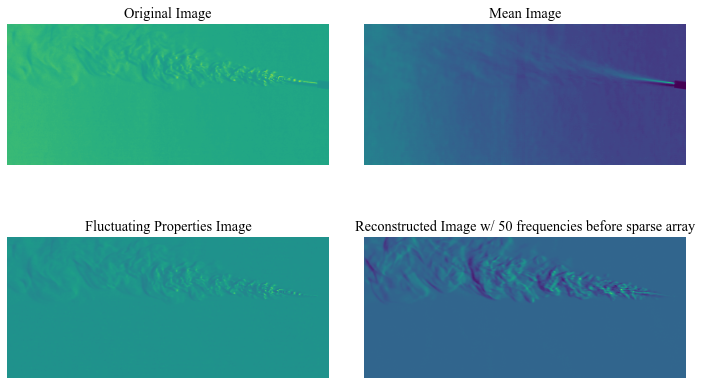

In [9]:
# Plotting sample images
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 12})

figure1, axarr = plt.subplots(2,2)
figure1.set_size_inches(10,6)
figure1.tight_layout(pad=0.5)

axarr[0,0].imshow(np.reshape(IM_orig,(h,l),order='F')),axarr[0,0].set_title('Original Image'),axarr[0,0].axis('off')
axarr[0,1].imshow(np.reshape(IM_av,(h,l),order='F')),axarr[0,1].set_title('Mean Image'),axarr[0,1].axis('off')
axarr[1,0].imshow(np.reshape(IM_fl,(h,l),order='F')),axarr[1,0].set_title('Fluctuating Properties Image'),axarr[1,0].axis('off')
axarr[1,1].imshow(IM_rec),axarr[1,1].set_title('Reconstructed Image w/ '+ str(end_sel - beg_sel) +' frequencies before sparse array'),axarr[1,1].axis('off')

(-0.5, 639.5, 279.5, -0.5)

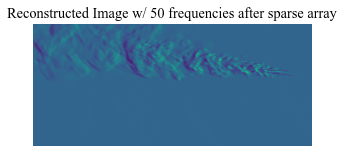

In [10]:
# Reconstruction after sparse arrays
B1 = IM_fsr4.toarray() + IM_fsi4.toarray()*1j # Recalling Frequencies from sparse arrays
B1 = np.fft.ifft(B1).real# Preforming inverse FFT to get figures
B1 = np.int16(B1)

plt.rcParams['figure.figsize']=[5,5]
plt.rcParams.update({'font.size': 12})

plt.imshow(np.reshape(B1[:,900],(h,l),order='F'))
plt.title('Reconstructed Image w/ '+ str(end_sel - beg_sel) +' frequencies after sparse array')
plt.axis('off')

### -------------------------------------- Frequency Reconstruction -----------------------------------------

Execution time :76.56s


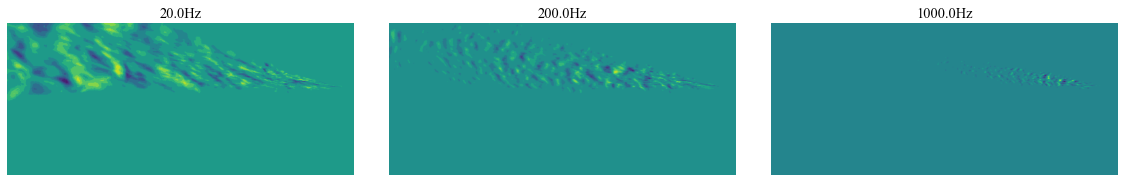

In [11]:
# Showing reconstructed individual images from stored data
begin_time = time.time()

plt.rcParams.update({'font.size': 12})
figure3, ax3 = plt.subplots(1,3)
figure3.set_size_inches(16,10)
figure3.tight_layout(pad=0.5)

B1 = IM_fsr4.toarray() + IM_fsi4.toarray()*1j     # Recalling Frequencies from sparse arrays
r = [1,10,50]                                     # images to reconstruct
farray = np.fft.fftfreq(im_imp,ts)                # Frequencies (np.fft.fftfreq)

for count in range(len(r)):
    sel = r[count]                                # Selection to reconstruct
    ind = np.abs(farray) == farray[sel]           # Index to further reduce array size down
    B2 = B1 * np.transpose(ind)                   # Applying index to matric for filtration
    B2 = np.fft.ifft(B2).real                     # Preforming inverse FFT to get figures
    B2 = np.int16(B2)                             # Converting image to int16 for viewing
    ax3[count].imshow(np.reshape(B2[:,1],(h,l),order='F'))
    ax3[count].set_title(str(farray[sel])+'Hz')
    ax3[count].axis('off')


del(B1, farray, B2)

print('Execution time :'+ str(round(time.time() - begin_time,2))+'s')

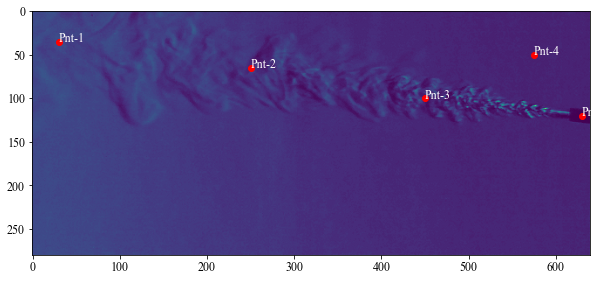

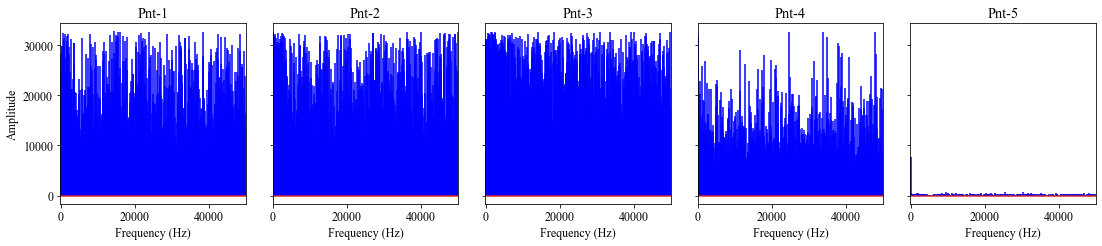

In [12]:
#
# Showing original image
shw = imread(fid)
plt.rcParams['figure.figsize']=[10,5]
plt.rcParams.update({'font.size': 12})
plt.imshow(shw)

# Saving frequency distribution for correlation
Data = np.zeros((int(im_imp/2),5),dtype = np.int16)

# # location of probes for various data sets
# #x = [30,250,450,575,610]# turbulent
# #y = [175,125,115,50,103]# turbulent
# x = [30,250,450,575,630]# turbu-laminar
# y = [35,65,100,50,120]# turbul-laminar


annotations=["Pnt-1","Pnt-2","Pnt-3","Pnt-4","Pnt-5"]
plt.scatter(x,y,  c='r')
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]),color="white")

    
# Plotting Frequencies at the various points
farray = np.fft.fftfreq(im_imp,ts)                # Frequencies (np.fft.fftfreq)
plt.rcParams.update({'font.size': 12})
figure4, ax4 = plt.subplots(1,5, sharey = True)
figure4.set_size_inches(15,3)
figure4.tight_layout(pad=0.5)
for count in range(len(x)):
    Data[:,count]= np.abs(IM_mg[(h*(x[count]-1) +y[count]),:])[0:int(im_imp/2)]
    ax4[count].stem(farray,np.abs(IM_mg[(h*(x[count]-1) +y[count]),:]),'b',markerfmt='none')
    ax4[count].set_xlabel('Frequency (Hz)')
    ax4[count].set_title(annotations[count])
    ax4[count].set_xlim([-100,50000])
ax4[0].set_ylabel('Amplitude')    

Data = pd.DataFrame(Data)
Data.to_excel(Test_number+".xlsx") 

#num = (h*(x[i]-1) +y[i])

### ---------------------------------------------------- Correlations -----------------------------------------------------------

In [13]:
# Correlating signals from both tests.
# To run this correlation session, both test 1 and 2 have to be run . If not an error will be generated. The code
# stores values in the .xlsx from the test runs to be pulled up later for analysis

Test_1 = pd.read_excel('Test_1.xlsx')
Test_2 = pd.read_excel('Test_2.xlsx')

Correlation = np.zeros((4,5))
Correlation = pd.DataFrame(Correlation,columns =['a','Test_1-Pt1', 'Test_1-Pt2', 'Test_1-Pt3', 'Test_1-Pt4'])
Correlation.a =['Test_2-Pt1', 'Test_2-Pt2', 'Test_2-Pt3', 'Test_2-Pt4']

for c1 in range(4):
    for c2 in range(4):
        Correlation.iat[c1,c2+1] = np.corrcoef(Test_2[c1],Test_1[c2])[0,1]

Correlation  

,a,Test_1-Pt1,Test_1-Pt2,Test_1-Pt3,Test_1-Pt4
0,Test_2-Pt1,0.002487,-0.000237,0.017223,0.036221
1,Test_2-Pt2,0.006863,0.009773,0.000492,0.033926
2,Test_2-Pt3,0.007492,-0.012611,-0.001690,0.058221
3,Test_2-Pt4,-0.009884,-0.000488,0.010958,0.000739


In [14]:
print('Execution time :'+ str(round(time.time() - begin_time_overall,2))+'s')

Execution time :944.42s
